In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats

# Load Datasets

In [3]:
# IoT Device #2 --> device_2_Ecobee_Thermostat
benign = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.benign.csv') 
benign.shape

# Botnet --> Mirai
# Attack --> Scan volnerable devices / Ack flooding / Syn flooding / UDP flooding / UDPplain

m_scan = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.mirai.scan.csv')
m_ack = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.mirai.ack.csv')
m_syn = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.mirai.syn.csv')
m_udp = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.mirai.udp.csv')
m_udpplain = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.mirai.udpplain.csv')

#Botnet --> Gafgyt (BASHLITE)
#Attack --> Scan vulnerable devices / Sending spam / UDP flooding / TCP flooding / Sending spam & opening connection
g_scan = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.gafgyt.scan.csv')
g_junk = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.gafgyt.junk.csv')
g_udp = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.gafgyt.udp.csv')
g_tcp = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.gafgyt.tcp.csv')
g_combo = pd.read_csv('/content/drive/MyDrive/5703 CP/Datasets/5.gafgyt.combo.csv')

In [4]:
print(m_scan.shape)
print(m_ack.shape)
print(m_syn.shape)
print(m_udp.shape)
print(m_udpplain.shape)
print(g_combo.shape)
print(g_junk.shape)
print(g_scan.shape)
print(g_tcp.shape)
print(g_udp.shape)

(96781, 115)
(60554, 115)
(65746, 115)
(156248, 115)
(56681, 115)
(61380, 115)
(30898, 115)
(29297, 115)
(104510, 115)
(104011, 115)


In [5]:
benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62154 entries, 0 to 62153
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 54.5 MB


In [6]:
#missing value 
benign.iloc[:,:60].isna().any(),benign.iloc[:,60:].isna().any()

(MI_dir_L5_weight         False
 MI_dir_L5_mean           False
 MI_dir_L5_variance       False
 MI_dir_L3_weight         False
 MI_dir_L3_mean           False
 MI_dir_L3_variance       False
 MI_dir_L1_weight         False
 MI_dir_L1_mean           False
 MI_dir_L1_variance       False
 MI_dir_L0.1_weight       False
 MI_dir_L0.1_mean         False
 MI_dir_L0.1_variance     False
 MI_dir_L0.01_weight      False
 MI_dir_L0.01_mean        False
 MI_dir_L0.01_variance    False
 H_L5_weight              False
 H_L5_mean                False
 H_L5_variance            False
 H_L3_weight              False
 H_L3_mean                False
 H_L3_variance            False
 H_L1_weight              False
 H_L1_mean                False
 H_L1_variance            False
 H_L0.1_weight            False
 H_L0.1_mean              False
 H_L0.1_variance          False
 H_L0.01_weight           False
 H_L0.01_mean             False
 H_L0.01_variance         False
 HH_L5_weight             False
 HH_L5_m

In [7]:
#checking if all the files have the same features 
print(g_combo.columns == benign.columns)
print(g_combo.columns == m_ack.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True 

# Convert into one dataset

In [8]:
# add new column
benign['type'] = 'benign'
m_scan['type'] = 'm_scan'
m_ack['type'] = 'm_ack'
m_syn['type']  = 'm_syn'
m_udp['type'] = 'm_udp'
m_udpplain['type'] = 'm_udpplain'
g_combo['type'] = 'g_combo'
g_junk['type'] = 'g_junk'
g_scan['type'] = 'g_scan'
g_tcp['type'] = 'g_tcp'
g_udp['type'] = 'g_udp'

In [9]:
d = pd.concat([benign,m_scan,m_ack,m_syn,m_udp,m_udpplain,g_combo,g_junk,g_scan,g_tcp,g_udp], axis=0, sort=False, ignore_index=True)
d.shape

(828260, 116)

In [10]:
#value counts
labels = d['type'].value_counts()
labels
label_count = pd.DataFrame({'labels': labels.index,'counts': labels.values})
label_count

,labels,counts
0,m_udp,156248
1,g_tcp,104510
2,g_udp,104011
3,m_scan,96781
4,m_syn,65746
5,benign,62154
6,g_combo,61380
7,m_ack,60554
8,m_udpplain,56681
9,g_junk,30898


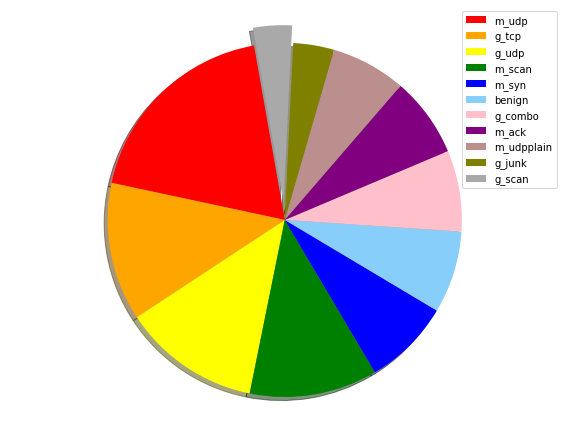

In [11]:
labels = label_count['labels']
sizes = label_count['counts']
plt.figure(figsize=(8,6))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'lightskyblue', 'pink', 'purple', 'rosybrown', 'olive', 'darkgrey']
# colors = [1,2,3,4,5,6,7,8,9,10,11]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
patches, texts = plt.pie(sizes, explode = explode, colors=colors, shadow=True, startangle=100, pctdistance=100, labeldistance=10)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Save dataset

In [12]:
d.to_csv('/content/drive/MyDrive/5703 CP/Device #5.csv')